In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from pycaret.classification import *
from sklearn.preprocessing import MinMaxScaler

In [15]:
# 1. Încărcarea setului de date Wine
wine = fetch_ucirepo(id=109)  
df = pd.concat([wine.data.features, wine.data.targets], axis=1)

In [16]:
# 2. Verificare date
df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

In [20]:
# 3. Preprocesare date
## Normalizare caracteristici (MinMax Scaling)
scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

In [21]:
# 4. Transformare etichete (renumire coloana target)
df.rename(columns={df.columns[-1]: "Target"}, inplace=True)

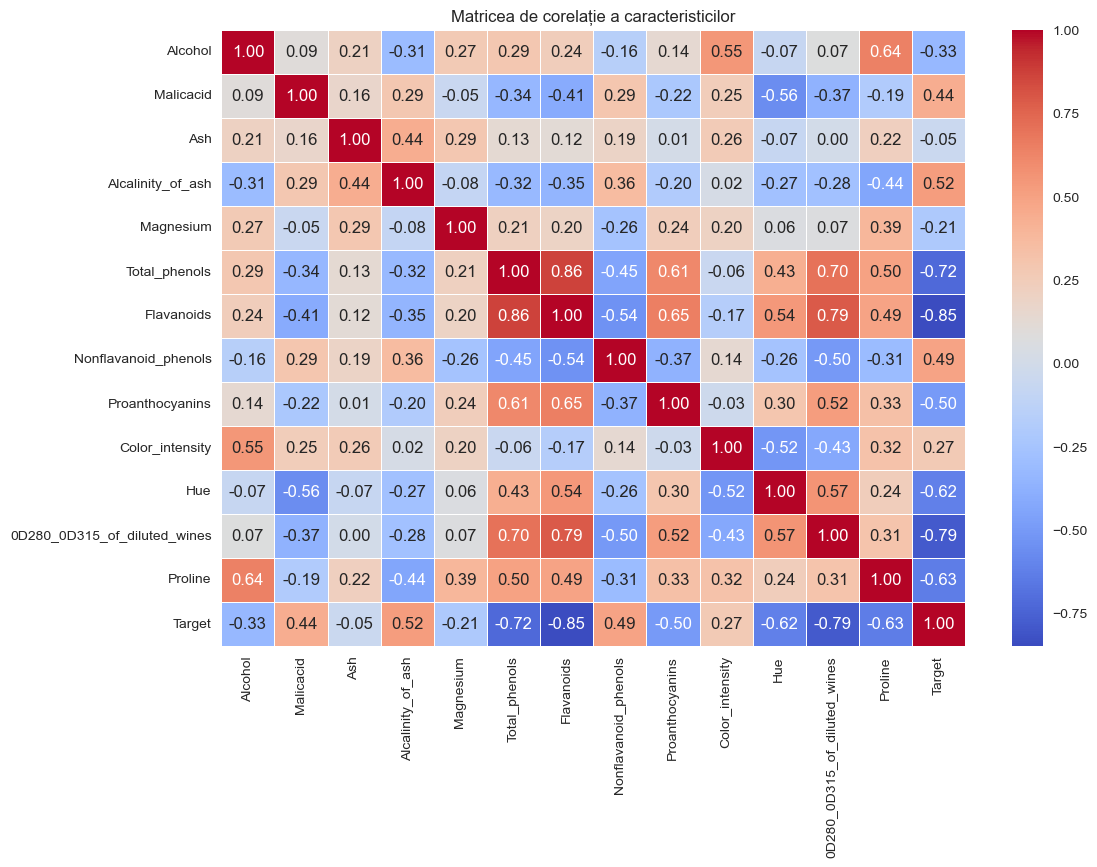

In [22]:
# 5. Vizualizare corelații între caracteristici
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matricea de corelație a caracteristicilor")
plt.show()

In [23]:
# 6. Configurare PyCaret pentru clasificare
clf = setup(data=df, target="Target", session_id=42, normalize=True)

,Description,Value
0,Session id,42
1,Target,Target
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(178, 14)"
5,Transformed data shape,"(178, 14)"
6,Transformed train set shape,"(124, 14)"
7,Transformed test set shape,"(54, 14)"
8,Numeric features,13
9,Preprocess,True


In [24]:
# 7. Antrenare și comparare modele
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9923,0.0000,0.9923,0.9938,0.9923,0.9885,0.9893,0.0100
lr,Logistic Regression,0.9840,0.0000,0.9840,0.9876,0.9841,0.9760,0.9777,0.7200
ridge,Ridge Classifier,0.9763,0.0000,0.9763,0.9818,0.9765,0.9644,0.9669,0.0090
lda,Linear Discriminant Analysis,0.9763,0.0000,0.9763,0.9818,0.9765,0.9644,0.9669,0.0060
rf,Random Forest Classifier,0.9756,0.9990,0.9756,0.9809,0.9758,0.9634,0.9660,0.0290
et,Extra Trees Classifier,0.9756,1.0000,0.9756,0.9809,0.9758,0.9634,0.9660,0.0250
lightgbm,Light Gradient Boosting Machine,0.9756,1.0000,0.9756,0.9807,0.9756,0.9631,0.9658,0.0320
qda,Quadratic Discriminant Analysis,0.9750,0.0000,0.9750,0.9764,0.9745,0.9614,0.9624,0.0070
knn,K Neighbors Classifier,0.9679,0.9940,0.9679,0.9748,0.9681,0.9519,0.9553,0.3800
nb,Naive Bayes,0.9513,0.9968,0.9513,0.9630,0.9500,0.9257,0.9327,0.0070


In [25]:
# 8. Testare și predicții
predictions = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9630,0,0.9630,0.9651,0.9626,0.9442,0.9457


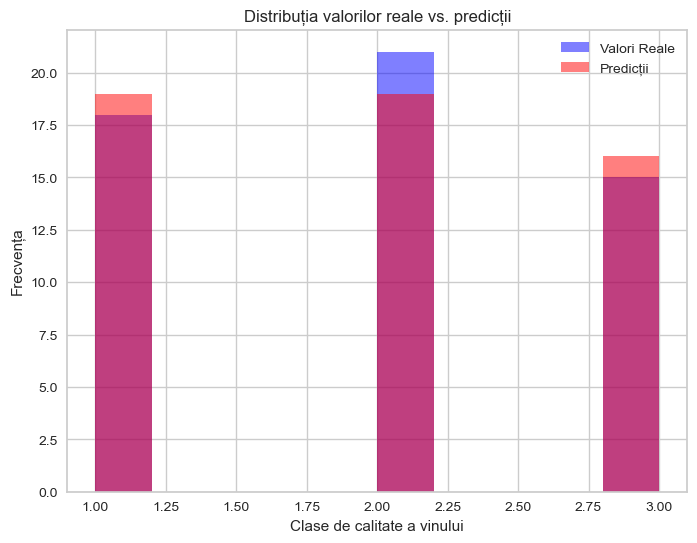

In [28]:
# 9. Vizualizare: Predicții vs. Valori reale
plt.figure(figsize=(8, 6))

plt.hist(predictions["Target"], bins=10, alpha=0.5, label="Valori Reale", color='blue')
plt.hist(predictions["prediction_label"], bins=10, alpha=0.5, label="Predicții", color='red')

plt.xlabel("Clase de calitate a vinului")
plt.ylabel("Frecvența")
plt.title("Distribuția valorilor reale vs. predicții")
plt.legend()

plt.show()


ValueError: num must be an integer with 1 <= num <= 12, not 13

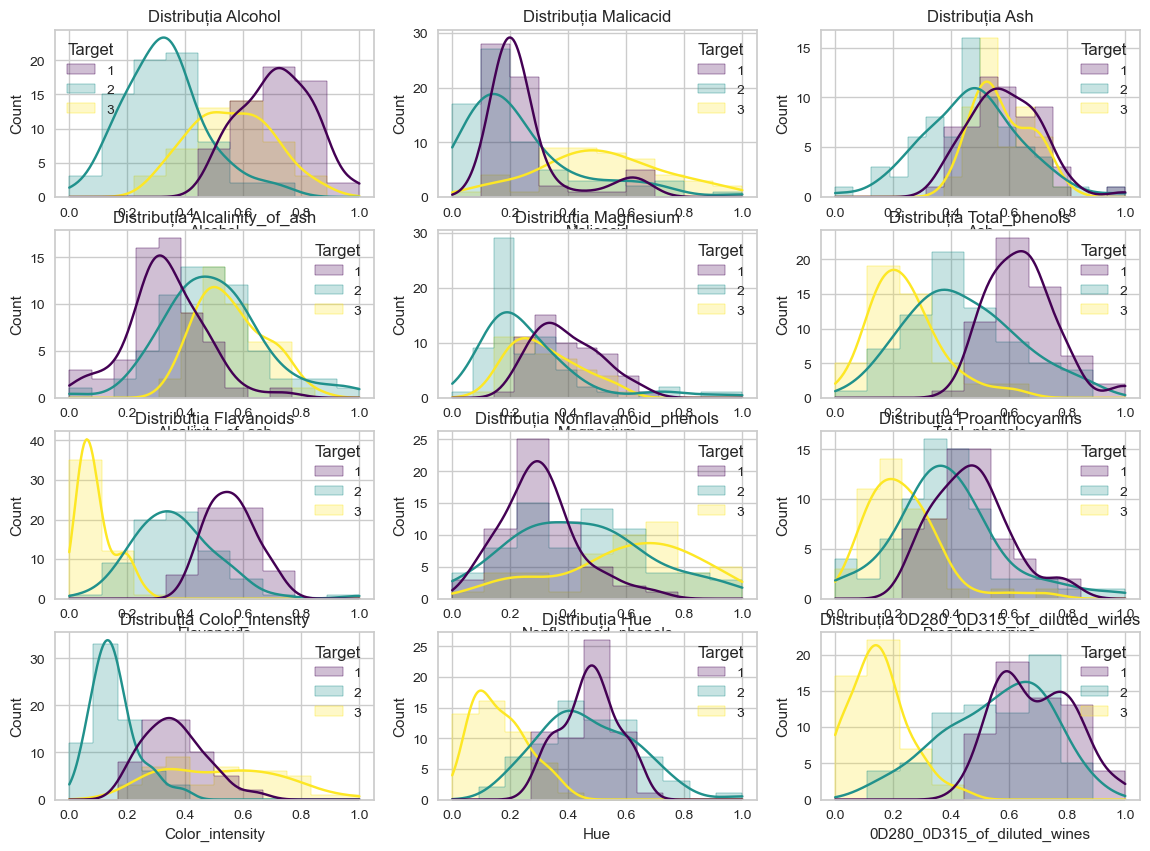

In [30]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 3, i+1)
    sns.histplot(data=df, x=col, kde=True, hue='Target', palette='viridis', element='step')
    plt.title(f'Distribuția {col}')
plt.tight_layout()
plt.show()


ValueError: num must be an integer with 1 <= num <= 12, not 13

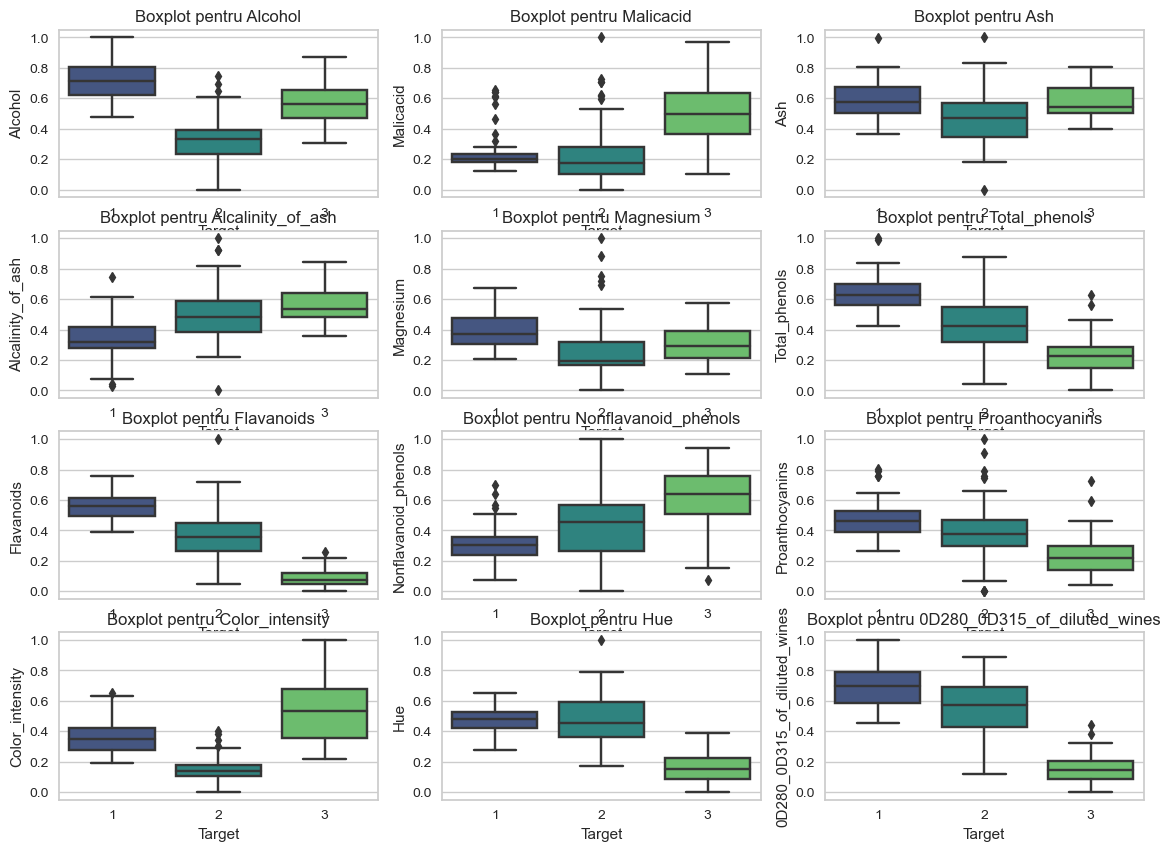

In [31]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='Target', y=col, data=df, palette='viridis')
    plt.title(f'Boxplot pentru {col}')
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(df, hue='Target', palette='viridis')
plt.title('Pairplot pentru caracteristici')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision = dict()
recall = dict()
average_precision = dict()

for i in range(len(df['Target'].unique())):
    precision[i], recall[i], _ = precision_recall_curve(df['Target'] == i, predictions['prediction_label'] == i)
    average_precision[i] = average_precision_score(df['Target'] == i, predictions['prediction_label'] == i)

plt.figure(figsize=(8, 6))
for i in range(len(df['Target'].unique())):
    plt.plot(recall[i], precision[i], label=f'Precision-Recall curve (AP = {average_precision[i]:.2f}) for class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve pentru fiecare clasă')
plt.legend(loc='best')
plt.show()